# Setup

In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 9.4MB/s 
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [3]:
!pip3 install quandl

  Using cached Quandl-3.5.0-py2.py3-none-any.whl (25 kB)
  Using cached inflection-0.4.0-py2.py3-none-any.whl (5.8 kB)


In [2]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = '1MN4xbFX3wwQNXvao-9-'
quandl.ApiConfig.api_version = '2015-04-09'

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# quandl.bulkdownload("GILD")

In [4]:
data = quandl.get("WIKI/GILD", returns="numpy")

In [5]:
data.shape

(6594,)

In [6]:
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of            Date   Open   High    Low  Close     Volume  Ex-Dividend  \
0    1992-01-22  17.25  21.75  17.25  20.25  5250700.0          0.0   
1    1992-01-23  21.00  22.75  20.25  22.00  1199000.0          0.0   
2    1992-01-24  22.25  23.25  21.50  22.25   376400.0          0.0   
3    1992-01-27  23.25  24.00  22.25  24.00   334900.0          0.0   
4    1992-01-28  23.75  24.25  22.75  23.50   622300.0          0.0   
...         ...    ...    ...    ...    ...        ...          ...   
6589 2018-03-21  76.74  77.44  76.21  76.49  5649040.0          0.0   
6590 2018-03-22  75.85  76.76  75.04  75.57  7508181.0          0.0   
6591 2018-03-23  75.38  75.62  72.73  72.84  8976615.0          0.0   
6592 2018-03-26  74.17  75.71  73.57  75.54  7186457.0          0.0   
6593 2018-03-27  75.98  76.15  73.55  74.11  6185615.0          0.0   

      Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
0             1.0   0.509500   0.642412

In [7]:
# quandl.bulkdownload("NSE")

In [8]:
GILD = quandl.get('WIKI/GILD')
SGEN = quandl.get('WIKI/SGEN')

In [9]:
import pandas as pd
# from pandas.io.json import json_normalize
# json_normalize
# !pip install -U pandas

In [10]:
# !pip install --upgrade pip setuptools

# !pip install stocker
# !python3 -m pip install stocker
# from stocker import Stocker

# this is a working source https://github.com/jcamiloangarita/stocker
import stocker

Using TensorFlow backend.


In [11]:
# amazon = Stocker('AMZN')
stocker.predict.tomorrow('AMZN')

[2319.42, 2.45, '2020-05-05']

In [12]:
# amazon.plot_stock()

In [13]:
# Stocker('GILD')

In [14]:
# import statsmodels.api as sm
# SARIMAXResults.get_prediction()


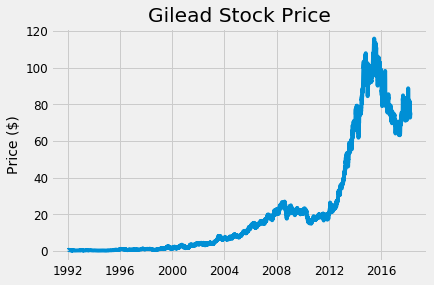

In [15]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(GILD.index, GILD['Adj. Close'])
plt.title('Gilead Stock Price')
plt.ylabel('Price ($)')
plt.show()

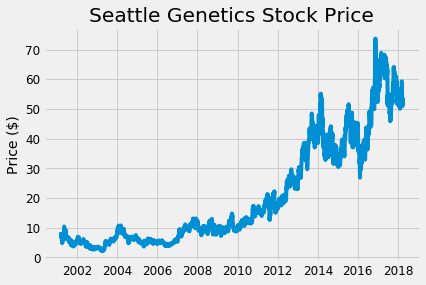

In [16]:
plt.plot(SGEN.index, SGEN['Adj. Close'])
plt.title('Seattle Genetics Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [17]:
# !pip install --upgrade --force-reinstall holidays # version '0.10.2'
GILD.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1992-01-22,17.25,21.75,17.25,20.25,5250700.0,0.0,1.0,0.509500,0.642412,0.509500,0.598108,168022400.0
1992-01-23,21.00,22.75,20.25,22.00,1199000.0,0.0,1.0,0.620260,0.671949,0.598108,0.649796,38368000.0
1992-01-24,22.25,23.25,21.50,22.25,376400.0,0.0,1.0,0.657181,0.686717,0.635028,0.657181,12044800.0
1992-01-27,23.25,24.00,22.25,24.00,334900.0,0.0,1.0,0.686717,0.708869,0.657181,0.708869,10716800.0
1992-01-28,23.75,24.25,22.75,23.50,622300.0,0.0,1.0,0.701485,0.716253,0.671949,0.694101,19913600.0


In [18]:
# !python3 -m pip install fbprophet
#from dateutil.easter import easter # fix for ImportError: cannot import name 'easter' from 'holidays' 
#(/Users/dpong/anaconda3/lib/python3.7/site-packages/holidays/__init__.py)
import plotly
import fbprophet
print(fbprophet.__version__)

0.6


In [19]:
import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.write_html('first_figure.html', auto_open=True)

In [20]:
GILD.reset_index(inplace = True)

In [21]:
# Prophet requires columns ds (Date) and y (value)

gild = GILD.rename(columns={'Date': 'ds', 'Adj. Close': 'y'})

In [22]:
gild

,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,y,Adj. Volume
0,1992-01-22,17.25,21.75,17.25,20.25,5250700.0,0.0,1.0,0.509500,0.642412,0.509500,0.598108,168022400.0
1,1992-01-23,21.00,22.75,20.25,22.00,1199000.0,0.0,1.0,0.620260,0.671949,0.598108,0.649796,38368000.0
2,1992-01-24,22.25,23.25,21.50,22.25,376400.0,0.0,1.0,0.657181,0.686717,0.635028,0.657181,12044800.0
3,1992-01-27,23.25,24.00,22.25,24.00,334900.0,0.0,1.0,0.686717,0.708869,0.657181,0.708869,10716800.0
4,1992-01-28,23.75,24.25,22.75,23.50,622300.0,0.0,1.0,0.701485,0.716253,0.671949,0.694101,19913600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,2018-03-21,76.74,77.44,76.21,76.49,5649040.0,0.0,1.0,76.740000,77.440000,76.210000,76.490000,5649040.0
6590,2018-03-22,75.85,76.76,75.04,75.57,7508181.0,0.0,1.0,75.850000,76.760000,75.040000,75.570000,7508181.0
6591,2018-03-23,75.38,75.62,72.73,72.84,8976615.0,0.0,1.0,75.380000,75.620000,72.730000,72.840000,8976615.0
6592,2018-03-26,74.17,75.71,73.57,75.54,7186457.0,0.0,1.0,74.170000,75.710000,73.570000,75.540000,7186457.0


In [23]:
gild_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gild_prophet.fit(gild)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/dpong/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [24]:
# Make a future dataframe for 1 year
gild_forecast = gild_prophet.make_future_dataframe(periods=365 , freq='D')

# Make predictions 
gild_forecast = gild_prophet.predict(gild_forecast)

Text(0.5, 1, 'Stock Prices of Gilead (GILD)')

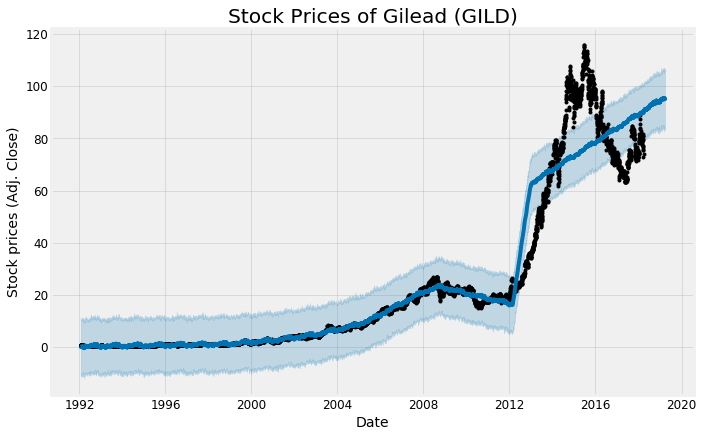

In [25]:
gild_prophet.plot(gild_forecast, xlabel = 'Date', ylabel = 'Stock prices (Adj. Close)')
plt.title('Stock Prices of Gilead (GILD)')

In [26]:
gild_prophet.changepoints[:10]

211    1992-11-19
422    1993-09-22
633    1994-07-25
844    1995-05-24
1055   1996-03-25
1266   1997-01-23
1477   1997-11-21
1688   1998-09-25
1899   1999-07-29
2110   2000-05-30
Name: ds, dtype: datetime64[ns]

In [32]:
gild_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
# !sudo pip3 install --upgrade pandas==0.25.3
# conda install -c conda-forge fbprophet==0.6

# Trends and Patterns

<Figure size 432x288 with 0 Axes>

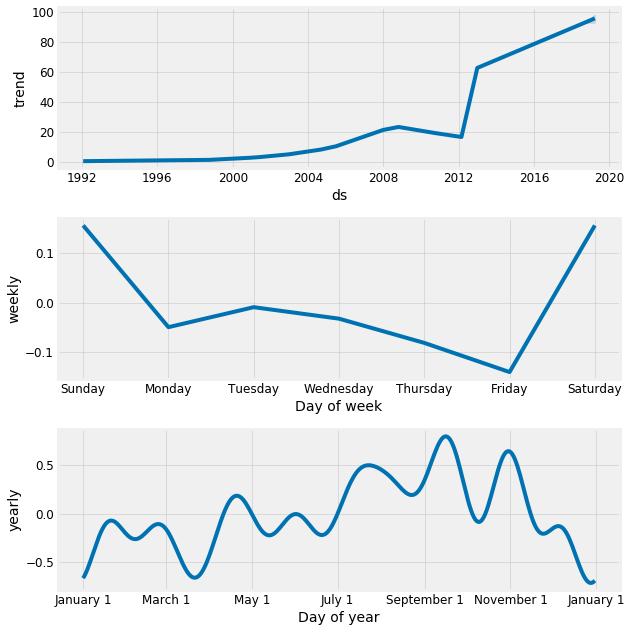

In [38]:
# Plot the trends and patterns
gild_prophet.plot_components(gild_forecast);